## Chapter 7: Embedding Text and Expressions

In [1]:
%matplotlib inline

### Using font dictionary

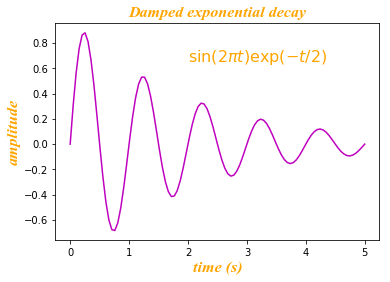

In [2]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'DejaVu Sans',
        'name': 'Times New Roman',
        'style':  'italic',
        'color':  'orange',
        'weight': 'bold',
        'size': 16
        }

t = np.linspace(0.0, 5.0, 100)
y = np.sin(2*np.pi*t) * np.exp(-t/2)

plt.plot(t, y, 'm')
plt.title('Damped exponential decay', fontdict=font)
plt.text(2, 0.65, r'$\sin(2 \pi t) \exp(-t/2)$', fontdict=font)
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('amplitude', fontdict=font)

# Adjust space to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

### Annotating a point on Polar Plot

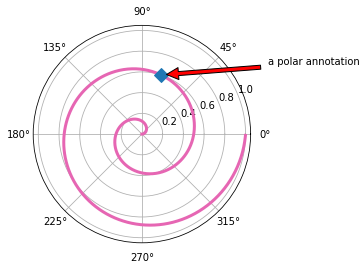

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')  # polar=True can also be used

r = np.arange(0,1,0.001)
theta = 2 * 2*np.pi * r
ax.plot(theta, r, color=[0.9,0.4,0.7], lw=3)
ind = 600

pointr, pointtheta = r[ind], theta[ind]
ax.plot([pointtheta], [pointr], 'D', markersize=10)
ax.annotate('a polar annotation',
            xy=(pointtheta, pointr),  # theta, radius
            xytext=(1.0, 0.75),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom')
plt.show()

### Using ConnectionPatch
Annotation without text

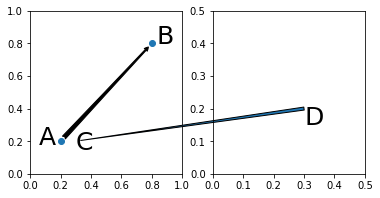

In [4]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

pointA = (0.2, 0.2)
pointB = (0.8, 0.8)
coordsA = "data"
coordsB = "data"
con = ConnectionPatch(pointA, pointB, coordsA, coordsB,
                      arrowstyle="fancy", shrinkA=5, shrinkB=5,fc="k")
ax1.plot([pointA[0], pointB[0]], [pointA[1], pointB[1]], "o")
ax1.add_artist(con)
ax1.text(0.06, 0.18, 'A', size=25, weight=50)
ax1.text(0.83, 0.8, 'B', size=25, weight=50)
ax1.text(0.3, 0.15, 'C', size=25, weight=50)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

pointC = (0.3, 0.2)
coordsC = "data"
coordsD = "data"
con = ConnectionPatch(xyA=pointC, xyB=pointC, coordsA=coordsC, coordsB=coordsD,
                      axesA=ax2, axesB=ax1,
                      arrowstyle="wedge", shrinkB=5)
ax2.add_artist(con)
ax2.text(0.3, 0.15, 'D', size=25, weight=50)
ax2.set_xlim(0, .5)
ax2.set_ylim(0, .5)

plt.show()

### Using a Text Box

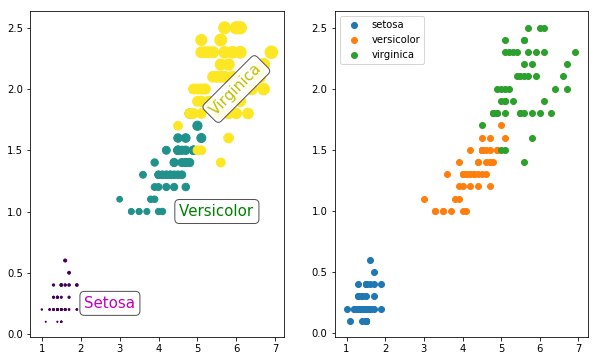

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,6))

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species1'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
ax[0].scatter(iris.petal_length, iris.petal_width, s=10*iris.petal_length*iris.petal_width, 
            c=iris.species1)

bbox_props = dict(boxstyle="round", fc="w", ec="0.25", alpha=0.9)
ax[0].text(2.75, 0.25, "Setosa", ha="center", va="center", size=15, color='m',
        bbox=bbox_props)
ax[0].text(5.5, 1.0, "Versicolor", ha="center", va="center", size=15,color='g',
        bbox=bbox_props)
ax[0].text(6.0, 2.0, "Virginica", ha="center", va="center", size=15, rotation=45, color='y',
        bbox=bbox_props)

x,y = iris['petal_length'],  iris['petal_width']
classes = sorted(set(iris['species']))             # added "sorted" to get same order for 3.0

for name in classes:
    index = iris['species'] == name
    ax[1].scatter(x[index], y[index], marker='o', label=name)

plt.legend()

plt.show()

### Custom Box Style

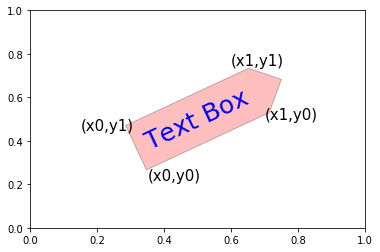

In [6]:
import matplotlib.pyplot as plt
from matplotlib.path import Path

def tbox_custom_style(x0, y0, width, height, size, mutation_aspect=1):
    
    pad = 0.5 * size
    x0, y0 = x0 - pad, y0 - pad
    width, height = width + 2 * pad, height + 2 * pad
    x1, y1 = x0 + width, y0 + height
    
    # Define the points along with first curve to be drawn
    verts = [(x0, y0),          # left, bottom
              (x1, y0),       # right, bottom
              (x1 + 2*pad, y0 + 2*pad), #arrow
              (x1, y1),       # right, top
              (x0, y1),       # left, top
              (x0, y0)]       # left, bottom
    # How to draw the plot along above points
    codes = [Path.MOVETO,       # Go to first point specified in vert1
             Path.LINETO,        # Draw a line from first point to second point
             Path.LINETO,
             Path.LINETO,        # Draw another line from current point to next point
             Path.LINETO,        # Draw another line from current point to next point
             Path.CLOSEPOLY]     # Close the loop
    # Create complete path with points and lines/curves
    path = Path(verts, codes)
    return path

fig, ax = plt.subplots()
ax.text(0.5, 0.5, 'Text Box', size=25, va="center", ha="center", rotation=25, color='b',
        bbox=dict(boxstyle=tbox_custom_style, alpha=0.25, fc='r',ec='k'))
ax.text(0.35, 0.22, '(x0,y0)', size=15)
ax.text(0.7, 0.5, '(x1,y0)', size=15)
ax.text(0.6, 0.75, '(x1,y1)', size=15)
ax.text(0.15, 0.45, '(x0,y1)', size=15)

plt.show()

### Integral as the area under the curve

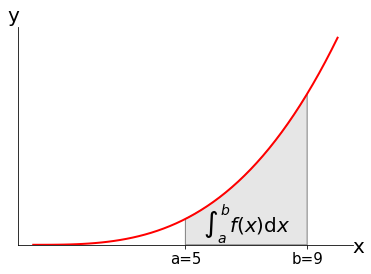

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

a, b = 5, 9                    # integral limits
x = np.linspace(0, 10)
y = x ** 3                     # 3rd order Polynomial curve

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(0)

# Plot the shaded region
intx = np.linspace(a, b)
inty = intx ** 3
verts = [(a, 0)] + list(zip(intx, inty)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 60, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.1, 'x', size=20)
plt.figtext(0.1, 0.9, 'y', size=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks((a, b))
ax.set_xticklabels(('a=5', 'b=9'), size=15)
ax.set_yticks([])

plt.show()

### Custom Markers

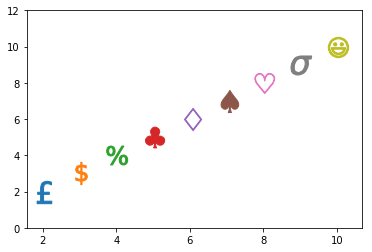

In [8]:
import matplotlib.pyplot as plt

custom_markers = ['$'+x+'$' for x in ['£','\$','\%','\clubsuit','\diamondsuit',
                  '\spadesuit','\heartsuit','\sigma', '😃']]
for i,marker in enumerate(custom_markers):
    plt.scatter(i+2,i+2,marker=marker,s=500) 
    plt.ylim(0,12)

plt.show()

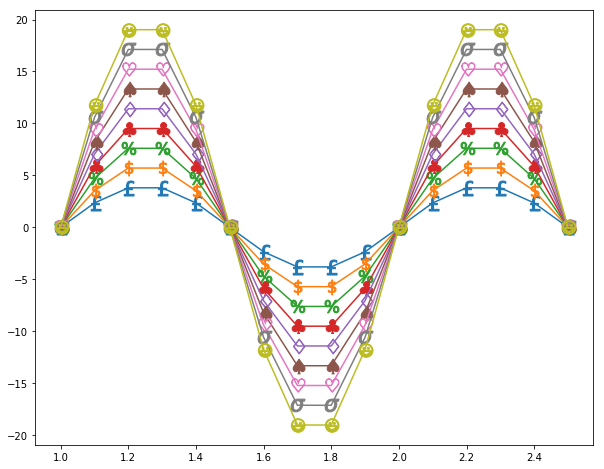

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 2.6, 0.1) 
y = np.sin(2 * np.pi * x)

plt.subplots(figsize=(10,8))

custom_markers = ['$'+x+'$' for x in ['£','\$','\%','\clubsuit','\diamondsuit',
                  '\spadesuit','\heartsuit','\sigma', '😃']]

for i,marker in enumerate(custom_markers):
    plt.plot(x, 2*(i+2)*y, marker=marker, markersize=15) 

plt.show()

### Fractions, Expressions and Symobols

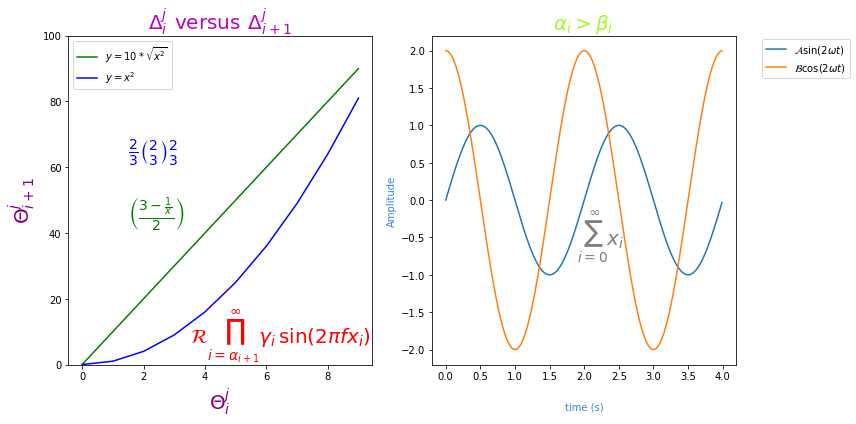

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 9, 10)
y = 10*np.sqrt(x**2)
y1 = x ** 2

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(x, y, 'g', label=r'$y=10*\sqrt{x^2}$')
ax[0].plot(x, y1, 'b',label=r'$y={x^2}$')
ax[0].legend()

ax[0].set_xlabel(r'$\Theta_i^j$', fontsize=20, color='#800080')
ax[0].set_ylabel(r'$\Theta_{i+1}^j$', fontsize=20, color='#800080')
ax[0].set_title(r'$\Delta_i^j \hspace{0.4} \mathrm{versus} \hspace{0.4} '
             r'\Delta_{i+1}^j$', fontsize=20, color='m')
ax[0].set_ylim(0,100)
text1 = r'$\frac{2}{3} \binom{2}{3} \stackrel{2}{3}$'
text2 = r'$\left(\frac{3 - \frac{1}{x}}{2}\right)$'
text3 = r'$\mathcal{R}\prod_{i=\alpha_{i+1}}^\infty \gamma_i\/\sin(2 \pi f x_i)$'
ax[0].text(1.5, 60, text1, fontsize=20, va='bottom', color='b')
ax[0].text(1.5, 40, text2, fontsize=20, va='bottom', color='g')
ax[0].text(3.5, 0, text3, fontsize=20, va='bottom', color='r')

A, B = 1, 2
t = np.arange(0.0, 4.0, 0.01)
s = A*np.sin(np.pi*t)
c = B*np.cos(np.pi*t)

ax[1].plot(t,s, label=r'$\mathcal{A}\mathrm{sin}(2 \omega t)$')
ax[1].plot(t,c, label=r'$\mathcal{B}\mathrm{cos}(2 \mathit{\omega} t)$')
ax[1].set_title(r'$\alpha_i > \beta_i$', fontsize=20, color='#A1F92F')
ax[1].text(1.9, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20, color='#808080')
ax[1].set_xlabel('time (s)', labelpad=20, color=(0.25, 0.5, 0.9))
ax[1].set_ylabel('Amplitude', color=(0.25, 0.5, 0.9))
ax[1].legend(bbox_to_anchor=(1.02, 1.05), borderaxespad=2)

plt.tight_layout()

plt.show()

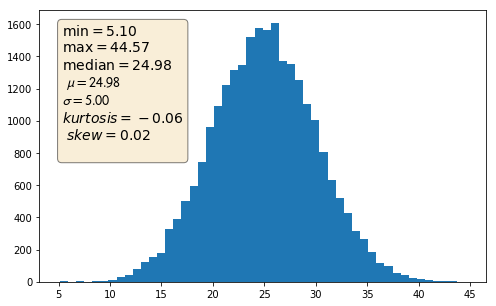

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

np.random.seed(19681211)

fig, ax = plt.subplots(figsize=(8,5))
x = np.random.normal(25, 5, 25000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
minimum = x.min()
maximum = x.max()
kurt = kurtosis(x)
skw = skew(x)

textstr = '$\mathrm{min}=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{median}=%.2f$\n \
$\mathcal{\mu=%.2f}$\n$\mathcal{\sigma=%.2f}$\n$\mathit{kurtosis}=%.2f$\n \
$\mathit{skew}=%.2f$\n' % (minimum, maximum, median, mu, sigma, kurt, skw)

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

### 2D Word Embeddings

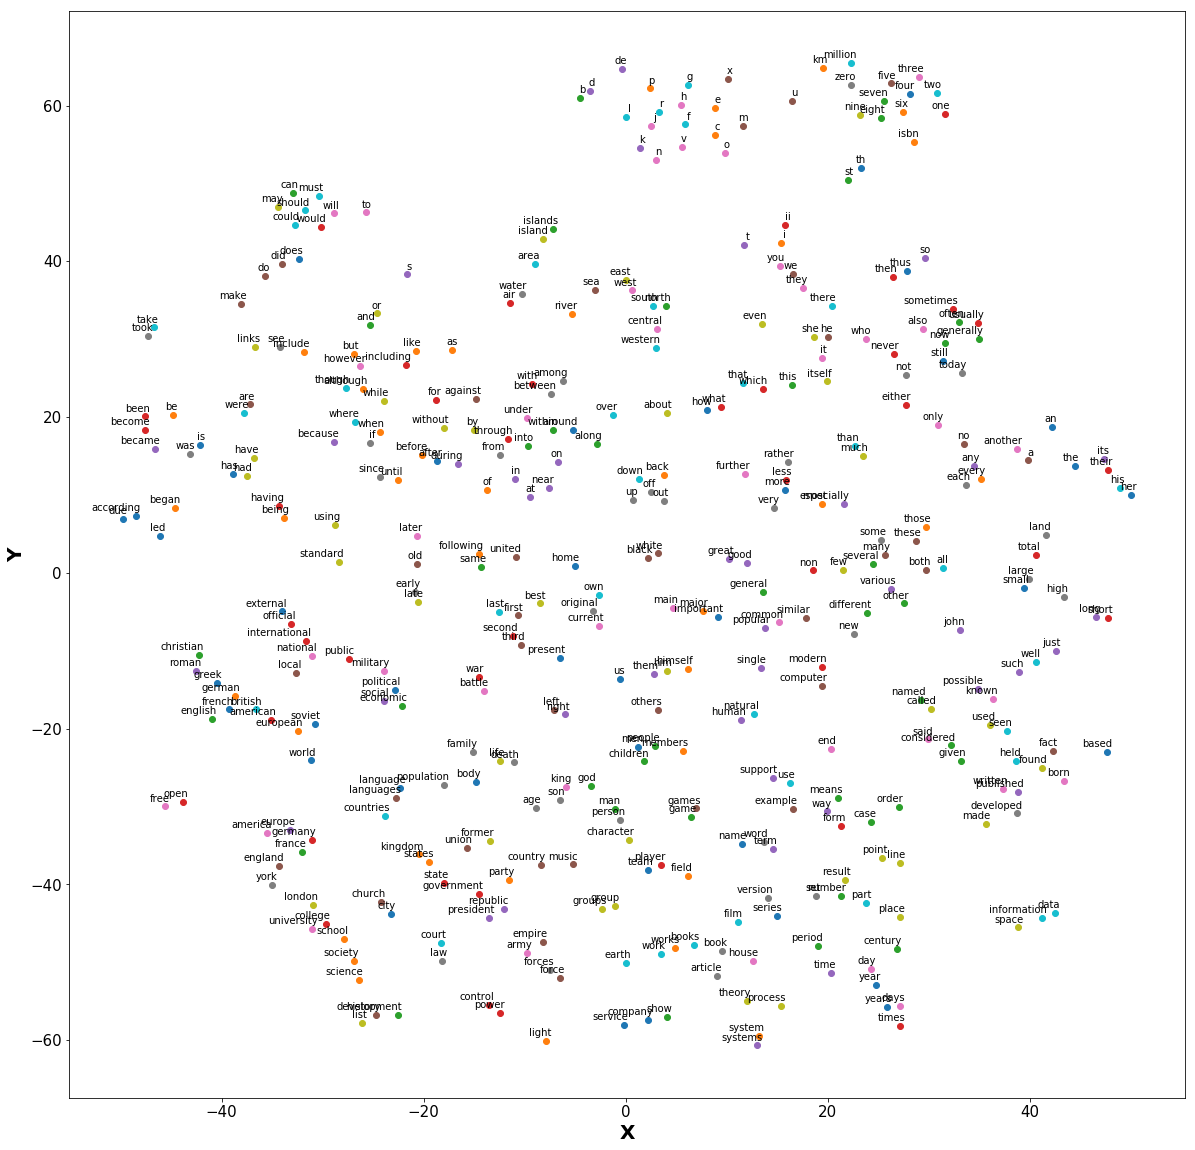

In [12]:
import matplotlib.pyplot as plt
import pickle

twod_embeddings = pickle.load(open('twod_embeddings','rb'))
reverse_dictionary = pickle.load(open('word_reverse_dictionary','rb'))

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

fig, ax = plt.subplots(figsize=(20,20))

num_points = 400
words = [reverse_dictionary[i] for i in range(1, num_points+1)]
for i, label in enumerate(words):
    x, y = twod_embeddings[i,:]
    ax.scatter(x, y)
    words = ax.annotate(label, xy=(x, y), xytext=(5, 3), textcoords='offset points',
                   ha='right', va='bottom')
    #plt.setp(words, size=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()